In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

# Get the data from the model

In [4]:
y_pred = pd.read_pickle('../data/pkl/y_pred_adv_test.pkl')
y_pred = y_pred[['GAME_ID', 'GAME_DATE', 'TEAM_NAME_h', 'TEAM_NAME_a', 'y_pred', 'PLUS_MINUS']]
y_pred.drop_duplicates(subset='GAME_ID', inplace=True)
y_pred['y_pred_spread'] = y_pred['y_pred']
y_pred

,GAME_ID,GAME_DATE,TEAM_NAME_h,TEAM_NAME_a,y_pred,PLUS_MINUS,y_pred_spread
0,21900373,2019-12-13,Hawks,Pacers,0.046749,-10.0,0.046749
6,21801139,2019-03-30,Pistons,Trail Blazers,3.024314,9.0,3.024314
12,22000577,2021-03-11,Trail Blazers,Suns,0.848462,-6.0,0.848462
18,22100417,2021-12-15,Cavaliers,Rockets,2.248967,35.0,2.248967
24,22100862,2022-02-14,Bucks,Trail Blazers,8.223619,-15.0,8.223619
...,...,...,...,...,...,...,...
5730,22100608,2022-01-10,Pistons,Jazz,1.464796,10.0,1.464796
5736,22200676,2023-01-18,Nuggets,Timberwolves,9.150328,4.0,9.150328
5742,21800242,2018-11-19,76ers,Suns,6.821165,5.0,6.821165
5748,12100060,2021-10-15,Pistons,76ers,1.677697,4.0,1.677697


# Get the historical betting data

In [13]:
bets = pd.read_pickle('../data/pkl/sbr_betting_data.pkl')
bets = bets.reset_index(drop=True)

In [14]:
bets

,Game_Date,Team_Name,Home,Opponent,Points,Pct_of_Bets,Opening_Spread,Opening_Odds,Betmgm,Betmgm_Odds,...,Fanduel_Odds,Fanduel_Odds,Caesars_Odds,Caesars_Odds,Pointsbet_Odds,Pointsbet_Odds,Wynn_Odds,Wynn_Odds,Betrivers_Odds,Betrivers_Odds
0,2023-03-05,Phoenix,0,Dallas,130,56%,+1.5,-110,-1.5,-115,...,-2,-108,-2,-110,-2,-110,-2,-110,-2,-112
1,2023-03-05,Dallas,1,Phoenix,126,44%,-1.5,-110,+1.5,-105,...,+2,-112,+2,-110,+2,-110,+2,-110,+2,-112
2,2023-03-05,Indiana,0,Chicago,125,53%,+6.5,-110,+5.5,-110,...,+5.5,-108,+5,-110,+5.5,-110,+5.5,-110,+5.5,-110
3,2023-03-05,Chicago,1,Indiana,122,47%,-6.5,-110,-5.5,-110,...,-5.5,-112,-5,-110,-5.5,-110,-5.5,-110,-5.5,-112
4,2023-03-05,Golden State,0,L.A. Lakers,105,60%,-5.5,-110,-5.5,-105,...,-5.5,-118,-5.5,-110,-5,-110,-5,-110,-5,-109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,2019-10-05,San Antonio,1,Orlando,89,-,-5.5,-110,,-,...,,-,,-,-6.5,-110,,-,,-
9862,2019-10-04,Houston,0,L.A. Clippers,109,-,-4.5,-110,,-,...,,-,,-,-5,-110,,-,,-
9863,2019-10-04,L.A. Clippers,1,Houston,96,-,+4.5,-110,,-,...,,-,,-,+5,-110,,-,,-
9864,2019-10-04,Indiana,0,Sacramento,132,-,+2.5,-110,,-,...,,-,,-,+5.5,-110,,-,,-


## Fix the messed up column names from the pickle data

In [15]:
temp = ['Draft_Kings', 'Fanduel', 'Caesars', 'Pointsbet', 'Wynn', 'Betrivers']
merge_df = bets[['Game_Date', 'Team_Name', 'Home', 'Opponent', 'Points', 'Pct_of_Bets',
       'Opening_Spread', 'Opening_Odds', 'Betmgm', 'Betmgm_Odds']]
for i in range(12):
    if i % 2 == 0:
        name = temp[int(i/2)]
        temp_df = pd.DataFrame(bets.iloc[:, (i+10)]).rename(columns={f'{name}_Odds': f'{name}_Spread'}).reset_index(drop=True)
    else:
        name = temp[int(i/2)-1]
        temp_df = pd.DataFrame(bets.iloc[:, (i+10)]).rename(columns={f'{name}_Odds': f'{name}_Odds'}).reset_index(drop=True)
    merge_df = merge_df.merge(temp_df, left_index=True, right_index=True)
bets = merge_df.copy()
bets.rename(columns={'Betmgm': 'Betmgm_Spread'}, inplace=True)

In [19]:
bets.to_pickle('sbr_betting_data.pkl')

In [16]:
bets.columns

Index(['Game_Date', 'Team_Name', 'Home', 'Opponent', 'Points', 'Pct_of_Bets',
       'Opening_Spread', 'Opening_Odds', 'Betmgm_Spread', 'Betmgm_Odds',
       'Draft_Kings_Spread', 'Draft_Kings_Odds', 'Fanduel_Spread',
       'Fanduel_Odds', 'Caesars_Spread', 'Caesars_Odds', 'Pointsbet_Spread',
       'Pointsbet_Odds', 'Wynn_Spread', 'Wynn_Odds', 'Betrivers_Spread',
       'Betrivers_Odds'],
      dtype='object')

In [17]:
sportsbooks_spreads = ['Opening_Spread','Betmgm_Spread', 'Draft_Kings_Spread', 'Fanduel_Spread', 
                       'Caesars_Spread', 'Pointsbet_Spread', 'Wynn_Spread', 'Betrivers_Spread']

sportsbooks_odds = ['Opening_Odds', 'Betmgm_Odds', 'Draft_Kings_Odds', 'Fanduel_Odds', 
                    'Caesars_Odds', 'Pointsbet_Odds', 'Wynn_Odds', 'Betrivers_Odds']

sportsbooks_spreads_odds = ['Betmgm_Spread', 'Betmgm_Odds',
       'Draft_Kings_Spread', 'Draft_Kings_Odds', 'Fanduel_Spread',
       'Fanduel_Odds', 'Caesars_Spread', 'Caesars_Odds', 'Pointsbet_Spread',
       'Pointsbet_Odds', 'Wynn_Spread', 'Wynn_Odds', 'Betrivers_Spread',
       'Betrivers_Odds']

In [10]:
bets = bets.replace(to_replace=['-', ''], value='1000')
bets = bets.replace(to_replace=['PK'], value='0')

In [11]:
bets[sportsbooks_spreads] = bets[sportsbooks_spreads].astype('float32')
bets[sportsbooks_odds] = bets[sportsbooks_odds].astype('int32')

In [12]:
bets = bets.replace(to_replace=[1000, '1000'], value=[np.nan, ''])
bets

,Game_Date,Team_Name,Home,Opponent,Points,Pct_of_Bets,Opening_Spread,Opening_Odds,Betmgm_Spread,Betmgm_Odds,...,Fanduel_Spread,Fanduel_Odds,Caesars_Spread,Caesars_Odds,Pointsbet_Spread,Pointsbet_Odds,Wynn_Spread,Wynn_Odds,Betrivers_Spread,Betrivers_Odds
0,2023-03-05,Phoenix,0,Dallas,130,56%,1.5,-110,-1.5,-115.0,...,-2.0,-108.0,-2.0,-110.0,-2.0,-110.0,-2.0,-110.0,-2.0,-112.0
1,2023-03-05,Dallas,1,Phoenix,126,44%,-1.5,-110,1.5,-105.0,...,2.0,-112.0,2.0,-110.0,2.0,-110.0,2.0,-110.0,2.0,-112.0
2,2023-03-05,Indiana,0,Chicago,125,53%,6.5,-110,5.5,-110.0,...,5.5,-108.0,5.0,-110.0,5.5,-110.0,5.5,-110.0,5.5,-110.0
3,2023-03-05,Chicago,1,Indiana,122,47%,-6.5,-110,-5.5,-110.0,...,-5.5,-112.0,-5.0,-110.0,-5.5,-110.0,-5.5,-110.0,-5.5,-112.0
4,2023-03-05,Golden State,0,L.A. Lakers,105,60%,-5.5,-110,-5.5,-105.0,...,-5.5,-118.0,-5.5,-110.0,-5.0,-110.0,-5.0,-110.0,-5.0,-109.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,2019-10-05,San Antonio,1,Orlando,89,,-5.5,-110,NaN,NaN,...,NaN,NaN,NaN,NaN,-6.5,-110.0,NaN,NaN,NaN,NaN
9862,2019-10-04,Houston,0,L.A. Clippers,109,,-4.5,-110,NaN,NaN,...,NaN,NaN,NaN,NaN,-5.0,-110.0,NaN,NaN,NaN,NaN
9863,2019-10-04,L.A. Clippers,1,Houston,96,,4.5,-110,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,-110.0,NaN,NaN,NaN,NaN
9864,2019-10-04,Indiana,0,Sacramento,132,,2.5,-110,NaN,NaN,...,NaN,NaN,NaN,NaN,5.5,-110.0,NaN,NaN,NaN,NaN


# Compare the data

In [492]:
y_pred['TEAM_NAME_a'].sort_values().unique()
team_name = ['Hawks', 'Celtics', 'Nets', 'Hornets', 'Bulls', 'Cavaliers', 'Mavericks', 'Nuggets', 'Pistons',
            'Warriors', 'Rockets', 'Pacers', 'Clippers', 'Lakers', 'Grizzlies', 'Heat', 'Bucks', 'Timberwolves',
            'Pelicans', 'Knicks', 'Thunder', 'Magic', '76ers', 'Suns', 'Trail Blazers', 'Kings', 'Spurs',
            'Raptors', 'Jazz', 'Wizards']
team_city = bets['Team_Name'].sort_values().unique().tolist()
map = {}
for i, name in enumerate(team_name):
    map[name] = team_city[i]
y_pred = y_pred.replace({'TEAM_NAME_h': map, 'TEAM_NAME_a': map})

In [493]:
def home_team(row):
    return [row.Opponent if row.Home==0 else row.Team_Name][0]
home=[]
for i in range(len(bets)):
    row=bets.iloc[i]
    home.append([row.Opponent if row.Home==0 else row.Team_Name][0])
bets['TEAM_NAME_h'] = home
bets

,Game_Date,Team_Name,Home,Opponent,Points,Pct_of_Bets,Opening_Spread,Opening_Odds,Betmgm_Spread,Betmgm_Odds,...,Fanduel_Odds,Caesars_Spread,Caesars_Odds,Pointsbet_Spread,Pointsbet_Odds,Wynn_Spread,Wynn_Odds,Betrivers_Spread,Betrivers_Odds,TEAM_NAME_h
0,2023-03-05,Phoenix,0,Dallas,130,56%,1.5,-110,-1.5,-115.0,...,-108.0,-2.0,-110.0,-2.0,-110.0,-2.0,-110.0,-2.0,-112.0,Dallas
1,2023-03-05,Dallas,1,Phoenix,126,44%,-1.5,-110,1.5,-105.0,...,-112.0,2.0,-110.0,2.0,-110.0,2.0,-110.0,2.0,-112.0,Dallas
2,2023-03-05,Indiana,0,Chicago,125,53%,6.5,-110,5.5,-110.0,...,-108.0,5.0,-110.0,5.5,-110.0,5.5,-110.0,5.5,-110.0,Chicago
3,2023-03-05,Chicago,1,Indiana,122,47%,-6.5,-110,-5.5,-110.0,...,-112.0,-5.0,-110.0,-5.5,-110.0,-5.5,-110.0,-5.5,-112.0,Chicago
4,2023-03-05,Golden State,0,L.A. Lakers,105,60%,-5.5,-110,-5.5,-105.0,...,-118.0,-5.5,-110.0,-5.0,-110.0,-5.0,-110.0,-5.0,-109.0,L.A. Lakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861,2019-10-05,San Antonio,1,Orlando,89,,-5.5,-110,NaN,NaN,...,NaN,NaN,NaN,-6.5,-110.0,NaN,NaN,NaN,NaN,San Antonio
9862,2019-10-04,Houston,0,L.A. Clippers,109,,-4.5,-110,NaN,NaN,...,NaN,NaN,NaN,-5.0,-110.0,NaN,NaN,NaN,NaN,L.A. Clippers
9863,2019-10-04,L.A. Clippers,1,Houston,96,,4.5,-110,NaN,NaN,...,NaN,NaN,NaN,5.0,-110.0,NaN,NaN,NaN,NaN,L.A. Clippers
9864,2019-10-04,Indiana,0,Sacramento,132,,2.5,-110,NaN,NaN,...,NaN,NaN,NaN,5.5,-110.0,NaN,NaN,NaN,NaN,Sacramento


In [494]:
bets['Game_Date'] = pd.to_datetime(bets['Game_Date'])

In [495]:
compare = bets.merge(y_pred, left_on=['Game_Date', 'TEAM_NAME_h'], right_on=['GAME_DATE', 'TEAM_NAME_h'])

In [496]:
compare

,Game_Date,Team_Name,Home,Opponent,Points,Pct_of_Bets,Opening_Spread,Opening_Odds,Betmgm_Spread,Betmgm_Odds,...,Wynn_Odds,Betrivers_Spread,Betrivers_Odds,TEAM_NAME_h,GAME_ID,GAME_DATE,TEAM_NAME_a,y_pred,PLUS_MINUS,y_pred_spread
0,2023-03-05,Phoenix,0,Dallas,130,56%,1.5,-110,-1.5,-115.0,...,-110.0,-2.0,-112.0,Dallas,22200962,2023-03-05,Phoenix,0.096508,-4.0,-0.096508
1,2023-03-05,Dallas,1,Phoenix,126,44%,-1.5,-110,1.5,-105.0,...,-110.0,2.0,-112.0,Dallas,22200962,2023-03-05,Phoenix,0.096508,-4.0,-0.096508
2,2023-03-05,Memphis,0,L.A. Clippers,129,39%,6.5,-110,7.5,-110.0,...,-105.0,7.0,-110.0,L.A. Clippers,22200970,2023-03-05,Memphis,-7.590507,6.0,7.590507
3,2023-03-05,L.A. Clippers,1,Memphis,135,61%,-6.5,-110,-7.5,-110.0,...,-115.0,-7.0,-113.0,L.A. Clippers,22200970,2023-03-05,Memphis,-7.590507,6.0,7.590507
4,2023-03-04,Toronto,0,Washington,116,53%,1.5,-110,-2.5,-110.0,...,-110.0,-2.5,-110.0,Washington,22200956,2023-03-04,Toronto,-2.782307,-7.0,2.782307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1623,2019-10-07,Chicago,1,Milwaukee,112,,5.5,-110,NaN,NaN,...,NaN,NaN,NaN,Chicago,11900016,2019-10-07,Milwaukee,-3.333493,-10.0,3.333493
1624,2019-10-05,Sacramento,0,Indiana,106,,3.0,-110,NaN,NaN,...,NaN,NaN,NaN,Indiana,11900005,2019-10-05,Sacramento,4.269475,24.0,-4.269475
1625,2019-10-05,Indiana,1,Sacramento,130,,-3.0,-110,NaN,NaN,...,NaN,NaN,NaN,Indiana,11900005,2019-10-05,Sacramento,4.269475,24.0,-4.269475
1626,2019-10-04,Indiana,0,Sacramento,132,,2.5,-110,NaN,NaN,...,NaN,NaN,NaN,Sacramento,11900003,2019-10-04,Indiana,1.177285,-1.0,-1.177285


# Compare the data using selection

In [497]:
compare = compare[['Game_Date', 'Team_Name', 'Home', 'Opponent','Opening_Spread', 'y_pred_spread', 'PLUS_MINUS']]
compare.head(20)

,Game_Date,Team_Name,Home,Opponent,Opening_Spread,y_pred_spread,PLUS_MINUS
0,2023-03-05,Phoenix,0,Dallas,1.5,-0.096508,-4.0
1,2023-03-05,Dallas,1,Phoenix,-1.5,-0.096508,-4.0
2,2023-03-05,Memphis,0,L.A. Clippers,6.5,7.590507,6.0
3,2023-03-05,L.A. Clippers,1,Memphis,-6.5,7.590507,6.0
4,2023-03-04,Toronto,0,Washington,1.5,2.782307,-7.0
5,2023-03-04,Washington,1,Toronto,-1.5,2.782307,-7.0
6,2023-03-04,Detroit,0,Cleveland,13.5,-3.304928,24.0
7,2023-03-04,Cleveland,1,Detroit,-13.5,-3.304928,24.0
8,2023-03-02,Toronto,0,Washington,-1.5,-7.241134,11.0
9,2023-03-02,Washington,1,Toronto,1.5,-7.241134,11.0


In [512]:
home = compare[compare['Home'] == 1]

In [513]:
spread = home.Opening_Spread.tolist()
pred = home.y_pred_spread.tolist()

In [514]:
def bet(spread, pred):
    if spread < 0:
        if pred < spread:
            return 'Favorite'
        else:
            return 'Underdog'

In [515]:
bets = []
for i in range(len(spread)):
    bets.append(bet(spread[i], pred[i]))
home['bet'] = bets

/tmp/ipykernel_14198/1744302438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home['bet'] = bets


In [516]:
home

,Game_Date,Team_Name,Home,Opponent,Opening_Spread,y_pred_spread,PLUS_MINUS,bet
1,2023-03-05,Dallas,1,Phoenix,-1.5,-0.096508,-4.0,Underdog
3,2023-03-05,L.A. Clippers,1,Memphis,-6.5,7.590507,6.0,Underdog
5,2023-03-04,Washington,1,Toronto,-1.5,2.782307,-7.0,Underdog
7,2023-03-04,Cleveland,1,Detroit,-13.5,-3.304928,24.0,Underdog
9,2023-03-02,Washington,1,Toronto,1.5,-7.241134,11.0,None
...,...,...,...,...,...,...,...,...
1619,2019-10-14,Phoenix,1,Denver,6.5,-1.930673,-5.0,None
1621,2019-10-13,Washington,1,Milwaukee,5.5,3.675796,-7.0,None
1623,2019-10-07,Chicago,1,Milwaukee,5.5,3.333493,-10.0,None
1625,2019-10-05,Indiana,1,Sacramento,-3.0,-4.269475,24.0,Favorite


In [540]:
favorites = compare[compare['Opening_Spread'] < 0]
favorites['PLUS_MINUS'] = favorites.PLUS_MINUS * -1

/tmp/ipykernel_14198/774029389.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favorites['PLUS_MINUS'] = favorites.PLUS_MINUS * -1


In [541]:
PLUS_MINUS = favorites.PLUS_MINUS.tolist()
bet = favorites.bet.tolist()

In [542]:
def win_or_lose(bet, plus_minus):
    if bet == 'Favorite':
        if 'PLUS_MINUS' > 'Opening_Spread':
            return 'Win'
        else:
            return 'Lose'
    else:
        if 'PLUS_MINUS' < 'Opening_Spread':
            return 'Win'
        else:
            return 'Lose'

In [543]:
result = []
for i in range(len(bet)):
    result.append(win_or_lose(bet[i], PLUS_MINUS[i]))
favorites['Result'] = result

/tmp/ipykernel_14198/1703647850.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  favorites['Result'] = result


In [544]:
favorites.Result.value_counts()

Lose    596
Win     217
Name: Result, dtype: int64

In [545]:
favorites

,Game_Date,Team_Name,Home,Opponent,Opening_Spread,y_pred_spread,PLUS_MINUS,bet,Result
1,2023-03-05,Dallas,1,Phoenix,-1.5,-0.096508,4.0,Underdog,Lose
3,2023-03-05,L.A. Clippers,1,Memphis,-6.5,7.590507,-6.0,Underdog,Lose
5,2023-03-04,Washington,1,Toronto,-1.5,2.782307,7.0,Underdog,Lose
7,2023-03-04,Cleveland,1,Detroit,-13.5,-3.304928,-24.0,Underdog,Lose
8,2023-03-02,Toronto,0,Washington,-1.5,-7.241134,-11.0,Favorite,Win
...,...,...,...,...,...,...,...,...,...
1618,2019-10-14,Denver,0,Phoenix,-6.5,-1.930673,5.0,Underdog,Lose
1620,2019-10-13,Milwaukee,0,Washington,-5.5,3.675796,7.0,Underdog,Lose
1622,2019-10-07,Milwaukee,0,Chicago,-5.5,3.333493,10.0,Underdog,Lose
1625,2019-10-05,Indiana,1,Sacramento,-3.0,-4.269475,-24.0,Favorite,Win


<Axes: xlabel='y_pred_spread', ylabel='Count'>

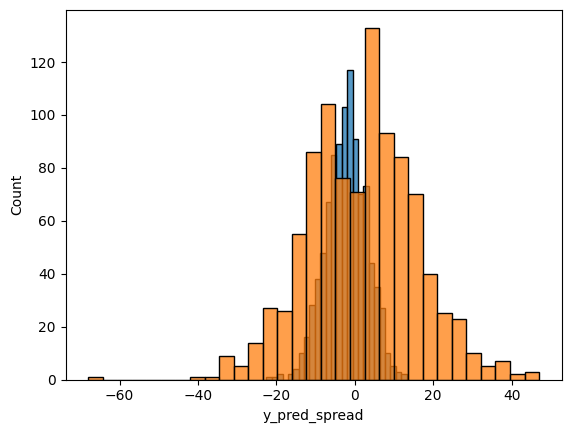

In [546]:
sns.histplot(y_pred['y_pred_spread'])
sns.histplot(y_pred['PLUS_MINUS'])